In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
weather = pd.read_csv('C:/project22/revised_final_fire_weather_7yr.csv')

In [3]:

r = 0.7
r2 = 0.7*0.7
r3 = 0.7*0.7*0.7
r4 = 0.7*0.7*0.7*0.7

for i in range(len(weather)):
    if i == 0 :
        weather.loc[i, '일평균실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'])
    elif i == 1:
        weather.loc[i, '일평균실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'])
    elif i == 2:
        weather.loc[i, '일평균실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] )
    elif i == 3:
        weather.loc[i, '일평균실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] + r3*weather.loc[i-3,'일평균상대습도'])
    else:
        weather.loc[i, '일평균실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] + r3*weather.loc[i-3,'일평균상대습도'] + r4*weather.loc[i-4,'일평균상대습도'])         

In [4]:
r = 0.7
r2 = 0.7*0.7
r3 = 0.7*0.7*0.7
r4 = 0.7*0.7*0.7*0.7

for i in range(len(weather)):
    if i == 0 :
        weather.loc[i, '일최소실효습도'] = (1-r)*(weather.loc[i, '일최소상대습도'])
    elif i == 1:
        weather.loc[i, '일최소실효습도'] = (1-r)*(weather.loc[i, '일최소상대습도'] + r*weather.loc[i-1,'일최소상대습도'])
    elif i == 2:
        weather.loc[i, '일최소실효습도'] = (1-r)*(weather.loc[i, '일최소상대습도'] + r*weather.loc[i-1,'일최소상대습도'] + r2*weather.loc[i-2,'일최소상대습도'] )
    elif i == 3:
        weather.loc[i, '일최소실효습도'] = (1-r)*(weather.loc[i, '일최소상대습도'] + r*weather.loc[i-1,'일최소상대습도'] + r2*weather.loc[i-2,'일최소상대습도'] + r3*weather.loc[i-3,'일최소상대습도'])
    else:
        weather.loc[i, '일최소실효습도'] = (1-r)*(weather.loc[i, '일최소상대습도'] + r*weather.loc[i-1,'일최소상대습도'] + r2*weather.loc[i-2,'일최소상대습도'] + r3*weather.loc[i-3,'일최소상대습도'] + r4*weather.loc[i-4,'일최소상대습도'])        

In [5]:
# 무강수 일수?
day = 0
# weather.loc[i, '실효습도']

for i in range(len(weather)):
    rain = weather.loc[i, '일강수량']
    if rain > 0:
        day = 0
        weather.loc[i, '무강수 일수'] = day
    else:
        day = day + 1
        weather.loc[i, '무강수 일수'] = day


In [6]:
weather['관측일'] =  (weather['관측일']).astype('str')
weather['발생월'] = weather['관측일'].str[4:6]
weather['발생월'] = weather['발생월'].astype('int')
weather = weather[(weather['발생월'] > 1) | (weather['발생월'] <6)]   # 2, 3, 4, 5
# weather = weather[(weather['발생월'] < 3) | (weather['발생월'] > 10)] # 1, 2, 11, 12

weather = weather[(weather['발생장소_시도'] == '경북')]


In [7]:
sanbul = weather[weather['산불발생여부'] == 1]

In [8]:
sanbul.head()

,산불발생여부,발생장소_시도,관측일,일최고기온,일평균현지기압,일최고현지기압,일최저현지기압,일평균해면기압,일최고해면기압,일최저해면기압,...,일최대순간풍속풍향,풍정합,일강수량,일평균전운량,최다운량,일합계일사량,일평균실효습도,일최소실효습도,무강수 일수,발생월
7,1,경북,20140104,7.679,1003.321,1005.200,1000.829,1018.743,1020.679,1015.900,...,163.571,1746.786,7.34,6.825,9.00,8.805,53.290004,29.096537,0.0,1
16,1,경북,20140109,0.193,1009.593,1013.871,1002.907,1025.429,1030.021,1018.400,...,280.000,3456.643,31.70,2.625,2.75,11.495,42.717235,25.868121,0.0,1
27,1,경북,20140114,3.579,1015.857,1017.371,1014.393,1031.793,1033.643,1029.821,...,271.429,1526.929,1.10,1.875,3.50,11.550,34.636638,15.668193,0.0,1
29,1,경북,20140115,4.264,1015.357,1017.143,1013.957,1031.171,1033.214,1029.421,...,290.000,1889.143,1.00,1.950,2.25,11.528,35.377094,16.770157,0.0,1
30,1,경북,20140115,4.264,1015.357,1017.143,1013.957,1031.171,1033.214,1029.421,...,290.000,1889.143,1.00,1.950,2.25,11.528,35.124247,16.907474,0.0,1


In [9]:
weather_g = sanbul.groupby('발생월').agg(["mean"])

C:\Users\user\AppData\Local\Temp\ipykernel_21168\2064008779.py:1: FutureWarning: ['발생장소_시도'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  weather_g = sanbul.groupby('발생월').agg(["mean"])


In [10]:
sanbul.groupby('발생월').count()


,산불발생여부,발생장소_시도,관측일,일최고기온,일평균현지기압,일최고현지기압,일최저현지기압,일평균해면기압,일최고해면기압,일최저해면기압,...,일최대순간풍속,일최대순간풍속풍향,풍정합,일강수량,일평균전운량,최다운량,일합계일사량,일평균실효습도,일최소실효습도,무강수 일수
발생월,,,,,,,,,,,,,,,,,,,,,
1,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
2,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
3,157,157,157,157,157,157,157,157,157,157,...,157,157,157,157,157,157,157,157,157,157
4,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113
5,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
6,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
7,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
8,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
9,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [11]:
count_g = sanbul.groupby('발생월').count()['산불발생여부']
count_g.columns = ['산불발생건수']
# groupby('mon_region').count()

In [12]:
# sanbul

In [13]:
df_new = pd.concat([weather_g, count_g], axis=1)

In [14]:
df_new

,"(산불발생여부, mean)","(관측일, mean)","(일최고기온, mean)","(일평균현지기압, mean)","(일최고현지기압, mean)","(일최저현지기압, mean)","(일평균해면기압, mean)","(일최고해면기압, mean)","(일최저해면기압, mean)","(일평균상대습도, mean)",...,"(일최대순간풍속풍향, mean)","(풍정합, mean)","(일강수량, mean)","(일평균전운량, mean)","(최다운량, mean)","(일합계일사량, mean)","(일평균실효습도, mean)","(일최소실효습도, mean)","(무강수 일수, mean)",산불발생여부
발생월,,,,,,,,,,,,,,,,,,,,,
1,1.0,inf,6.089481,1009.508741,1012.597796,1006.485019,1025.133000,1028.442722,1021.857759,48.633407,...,262.473611,1948.100593,1.827148,3.587833,7.103889,9.557204,41.122144,21.542270,2.518519,54
2,1.0,inf,7.317878,1007.332967,1010.323211,1004.417778,1022.833933,1026.015867,1019.650400,47.424911,...,244.968178,2149.776211,1.939111,4.284000,7.603322,11.375522,41.076443,21.070856,2.244444,90
3,1.0,inf,15.698242,1004.079624,1007.084834,1000.621726,1019.126363,1022.422433,1015.734924,47.602860,...,242.156503,2201.220803,0.510484,2.768637,6.741019,17.154064,40.354782,18.473294,5.477707,157
4,1.0,inf,21.264867,1001.608442,1004.404938,998.689664,1016.315381,1019.372752,1013.148212,45.726009,...,240.562540,2084.611575,0.524027,2.480204,6.075912,20.889301,38.657968,17.414250,6.336283,113
5,1.0,inf,27.470088,997.464485,1000.190691,992.462662,1011.728882,1014.710529,1008.605662,52.009103,...,224.621882,1949.062985,0.345574,3.566250,7.165441,23.247000,43.933328,22.144282,5.088235,68
6,1.0,inf,28.989183,994.280070,996.646803,991.854394,1008.376099,1010.981141,1005.806282,59.805437,...,204.879324,1681.101606,1.281366,4.319014,7.966521,21.751662,49.504119,27.225045,3.549296,71
7,1.0,2.237859e+70,34.405667,993.615111,995.226889,991.939778,1007.378444,1009.163444,1005.464222,69.502444,...,189.444667,1796.452333,0.447111,3.180000,6.027778,21.544667,59.780836,38.962037,1.222222,9
8,1.0,1.550062e+102,33.589538,994.315231,996.117615,992.464462,1008.189692,1010.118077,1006.053308,69.672923,...,202.637385,1615.313077,2.306846,4.463923,7.974308,21.150692,59.586739,38.760790,1.769231,13
9,1.0,3.358485e+46,25.206167,1001.797500,1004.536833,999.252333,1016.165500,1019.156000,1013.346500,70.635667,...,162.738000,1996.357167,2.217167,3.866667,8.162667,17.088833,60.096399,36.077606,1.333333,6


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


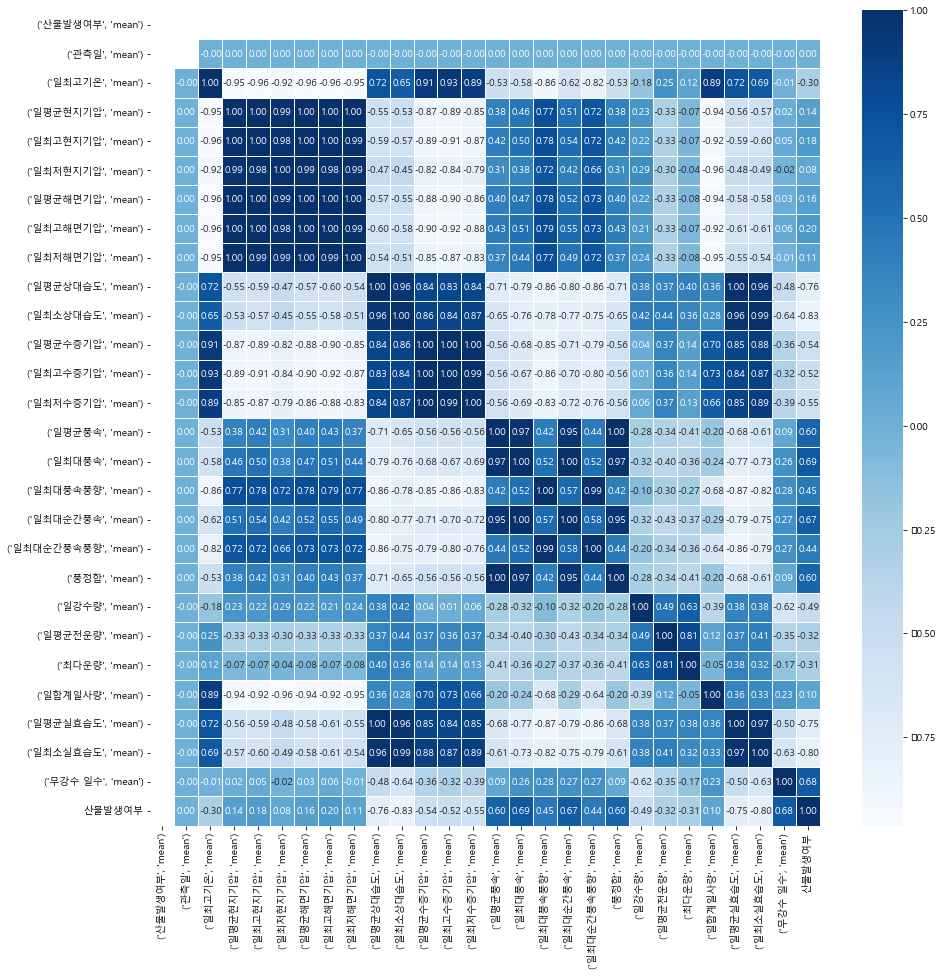

In [15]:
# df_new.corr()
# 히트맵 그려보기
plt.figure(figsize=(15, 15))
sns.heatmap(data = df_new.corr(), annot = True
            , fmt = '.2f', linewidths =.5, cmap= 'Blues')